# Data

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('merged_data.csv')
nhgis = pd.read_csv('./data/df_melt.csv')
df.head()

,year,county_name,county_fips,candidate,party,candidatevotes,totalvotes,population_2022,district,N1,...,N3,N4,N5,N6,N7,N8,N9,N10,N11,N12
0,2000,ACCOMACK,51001,AL GORE,DEMOCRAT,5092,11925,33191,2,NORTHUMBERLAND,...,MIDDLESEX,MATHEWS,NORTHAMPTON,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,ACCOMACK,51001,GEORGE W. BUSH,REPUBLICAN,6352,11925,33191,2,NORTHUMBERLAND,...,MIDDLESEX,MATHEWS,NORTHAMPTON,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,ACCOMACK,51001,RALPH NADER,GREEN,220,11925,33191,2,NORTHUMBERLAND,...,MIDDLESEX,MATHEWS,NORTHAMPTON,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,ACCOMACK,51001,OTHER,OTHER,261,11925,33191,2,NORTHUMBERLAND,...,MIDDLESEX,MATHEWS,NORTHAMPTON,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2004,ACCOMACK,51001,JOHN KERRY,DEMOCRAT,5518,13356,33191,2,NORTHUMBERLAND,...,MIDDLESEX,MATHEWS,NORTHAMPTON,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
nhgis.head()

,YEAR,FIPS,AV0AA,B78AA,AV1AA,AV1AB,AT5AA,AT5AB,AL8AA,AL8AB,...,A88AD,A88AE,AB2AA,BD5AA,AX6AA,CL6AA,AX7AA,AX7AB,BV8AA,BV8AB
0,2000,51001,38305.0,38305.0,18590.0,19715.0,36680.0,1625.0,22535.0,13983.0,...,3781.0,3195.0,34821.0,16309.0,37715.0,6788.0,6788.0,30927.0,957.0,5291.0
1,125,51001,33454.0,33454.0,16230.0,17224.0,31192.0,2262.0,18212.0,12696.0,...,2649.0,4604.0,50250.0,22909.0,33012.0,6678.0,6678.0,26334.0,1002.0,5147.0
2,195,51001,32673.0,32673.0,15934.0,16739.0,30148.0,2525.0,18418.0,11366.0,...,2395.0,5072.0,57711.0,26018.0,32325.0,6141.0,6141.0,26184.0,677.0,6603.0
3,2000,51003,79236.0,79236.0,38002.0,41234.0,73483.0,5753.0,39195.0,33535.0,...,5153.0,13401.0,63407.0,28852.0,77661.0,5232.0,5232.0,72429.0,430.0,8756.0
4,125,51003,99484.0,99484.0,47564.0,51920.0,89589.0,9895.0,46267.0,41638.0,...,3715.0,18225.0,89768.0,37837.0,93607.0,8321.0,8321.0,85286.0,643.0,13285.0


In [7]:
# in nhgis, rename all values with year as '125' to 2008'
nhgis['YEAR'] = nhgis['YEAR'].replace(125, 2008)
# in nhgis, rename all values with year as '195' to 2016'
nhgis['YEAR'] = nhgis['YEAR'].replace(195, 2016)
print(nhgis.shape)

(411, 162)


In [8]:
# for each row, if 'YEAR' is 2000, duplicate the row and change 'YEAR' to 2004. if 'YEAR' is 2008, duplicate the row and change 'YEAR' to 20012. if 'YEAR' is 2016, duplicate the row and change 'YEAR' to 2020.
df_2004 = nhgis[nhgis['YEAR'] == 2000].copy()
df_2004['YEAR'] = 2004

df_2012 = nhgis[nhgis['YEAR'] == 2008].copy()
df_2012['YEAR'] = 2012

df_2020 = nhgis[nhgis['YEAR'] == 2016].copy()
df_2020['YEAR'] = 2020

# Use pd.concat to append the new DataFrames to the original DataFrame
nhgis = pd.concat([nhgis, df_2004, df_2012, df_2020], ignore_index=True)
del df_2004, df_2012, df_2020
print(nhgis.shape)

(822, 162)


In [9]:
nhgis.head(20)

,YEAR,FIPS,AV0AA,B78AA,AV1AA,AV1AB,AT5AA,AT5AB,AL8AA,AL8AB,...,A88AD,A88AE,AB2AA,BD5AA,AX6AA,CL6AA,AX7AA,AX7AB,BV8AA,BV8AB
0,2000,51001,38305.0,38305.0,18590.0,19715.0,36680.0,1625.0,22535.0,13983.0,...,3781.0,3195.0,34821.0,16309.0,37715.0,6788.0,6788.0,30927.0,957.0,5291.0
1,2008,51001,33454.0,33454.0,16230.0,17224.0,31192.0,2262.0,18212.0,12696.0,...,2649.0,4604.0,50250.0,22909.0,33012.0,6678.0,6678.0,26334.0,1002.0,5147.0
2,2016,51001,32673.0,32673.0,15934.0,16739.0,30148.0,2525.0,18418.0,11366.0,...,2395.0,5072.0,57711.0,26018.0,32325.0,6141.0,6141.0,26184.0,677.0,6603.0
3,2000,51003,79236.0,79236.0,38002.0,41234.0,73483.0,5753.0,39195.0,33535.0,...,5153.0,13401.0,63407.0,28852.0,77661.0,5232.0,5232.0,72429.0,430.0,8756.0
4,2008,51003,99484.0,99484.0,47564.0,51920.0,89589.0,9895.0,46267.0,41638.0,...,3715.0,18225.0,89768.0,37837.0,93607.0,8321.0,8321.0,85286.0,643.0,13285.0
5,2016,51003,107405.0,107405.0,51363.0,56042.0,96238.0,11167.0,49663.0,44728.0,...,3419.0,20884.0,103077.0,44799.0,100293.0,9142.0,9142.0,91151.0,881.0,18026.0
6,2000,51510,128283.0,128283.0,61974.0,66309.0,95683.0,32600.0,27840.0,65288.0,...,6275.0,17685.0,67023.0,37645.0,126409.0,11279.0,11279.0,115130.0,939.0,9547.0
7,2008,51510,140337.0,140337.0,67565.0,72772.0,105123.0,35214.0,31614.0,70093.0,...,4415.0,23275.0,105721.0,54767.0,138832.0,11102.0,11102.0,127730.0,948.0,11587.0
8,2016,51510,157613.0,157613.0,75954.0,81659.0,114677.0,42936.0,33586.0,75911.0,...,3947.0,27731.0,130395.0,62679.0,156261.0,16108.0,16108.0,140153.0,1182.0,16164.0
9,2000,51005,12926.0,12926.0,6450.0,6476.0,12814.0,112.0,10074.0,2690.0,...,1265.0,1789.0,45843.0,19635.0,12682.0,905.0,905.0,11777.0,212.0,1758.0


In [10]:
# rename 'YEAR' column to 'year' in nhgis and 'FIPS' column to 'county_fips' in nhgis
nhgis = nhgis.rename(columns={'YEAR': 'year', 'FIPS': 'county_fips'})

# go through rows of df and join by 'year' and 'county_fips' with nhgis.
df = df.merge(nhgis, on=['year', 'county_fips'], how='left')
print(df.shape)

df.head(20)

(2544, 181)


,year,county_name,county_fips,candidate,party,candidatevotes,totalvotes,population_2022,district,N1,...,A88AD,A88AE,AB2AA,BD5AA,AX6AA,CL6AA,AX7AA,AX7AB,BV8AA,BV8AB
0,2000,ACCOMACK,51001,AL GORE,DEMOCRAT,5092,11925,33191,2,NORTHUMBERLAND,...,3781.0,3195.0,34821.0,16309.0,37715.0,6788.0,6788.0,30927.0,957.0,5291.0
1,2000,ACCOMACK,51001,GEORGE W. BUSH,REPUBLICAN,6352,11925,33191,2,NORTHUMBERLAND,...,3781.0,3195.0,34821.0,16309.0,37715.0,6788.0,6788.0,30927.0,957.0,5291.0
2,2000,ACCOMACK,51001,RALPH NADER,GREEN,220,11925,33191,2,NORTHUMBERLAND,...,3781.0,3195.0,34821.0,16309.0,37715.0,6788.0,6788.0,30927.0,957.0,5291.0
3,2000,ACCOMACK,51001,OTHER,OTHER,261,11925,33191,2,NORTHUMBERLAND,...,3781.0,3195.0,34821.0,16309.0,37715.0,6788.0,6788.0,30927.0,957.0,5291.0
4,2004,ACCOMACK,51001,JOHN KERRY,DEMOCRAT,5518,13356,33191,2,NORTHUMBERLAND,...,3781.0,3195.0,34821.0,16309.0,37715.0,6788.0,6788.0,30927.0,957.0,5291.0
5,2004,ACCOMACK,51001,GEORGE W. BUSH,REPUBLICAN,7726,13356,33191,2,NORTHUMBERLAND,...,3781.0,3195.0,34821.0,16309.0,37715.0,6788.0,6788.0,30927.0,957.0,5291.0
6,2004,ACCOMACK,51001,OTHER,OTHER,112,13356,33191,2,NORTHUMBERLAND,...,3781.0,3195.0,34821.0,16309.0,37715.0,6788.0,6788.0,30927.0,957.0,5291.0
7,2008,ACCOMACK,51001,BARACK OBAMA,DEMOCRAT,7607,15623,33191,2,NORTHUMBERLAND,...,2649.0,4604.0,50250.0,22909.0,33012.0,6678.0,6678.0,26334.0,1002.0,5147.0
8,2008,ACCOMACK,51001,JOHN MCCAIN,REPUBLICAN,7833,15623,33191,2,NORTHUMBERLAND,...,2649.0,4604.0,50250.0,22909.0,33012.0,6678.0,6678.0,26334.0,1002.0,5147.0
9,2008,ACCOMACK,51001,OTHER,OTHER,183,15623,33191,2,NORTHUMBERLAND,...,2649.0,4604.0,50250.0,22909.0,33012.0,6678.0,6678.0,26334.0,1002.0,5147.0


In [11]:
# drop column 'population_2022' in df
df = df.drop(columns=['population_2022'])
df.loc[: ,['AV0AA', 'year']].head(20)

,AV0AA,year
0,38305.0,2000
1,38305.0,2000
2,38305.0,2000
3,38305.0,2000
4,38305.0,2004
5,38305.0,2004
6,38305.0,2004
7,33454.0,2008
8,33454.0,2008
9,33454.0,2008


In [8]:
df.to_csv('properly_merged_data.csv', index=False)

# Visualization

In [13]:
import geopandas as gpd
import mapclassify
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [14]:
gdf = gpd.read_file('./va_admin_bndry/VirginiaCounty_ClippedToShoreline.shx')
mdf = pd.read_csv('properly_merged_data.csv')

In [15]:
# Merge shapefile data and county adjacency data:
gdf['FIPS_left'] = pd.to_numeric(gdf['STCOFIPS']) 
df_vis = gdf.merge(mdf,left_on='FIPS_left',right_on='county_fips')
del gdf, mdf

In [16]:
vdf = pd.read_csv('./data/voting_VA.csv')

### Education and Income

To best represent the education levels of each county in one metric, we can do a weighted average of the three education levels in the state, where the higher education level equates to a higher weight.

In [17]:
df_vis['Education_Index'] = (df_vis['B69AA'] * 1 + df_vis['B69AB'] * 2 + df_vis['B69AC'] * 3) / (df_vis['B69AA'] + df_vis['B69AB'] + df_vis['B69AC'])

We used a similar strategy of weighted averages when concerning the income metric.

In [24]:
# Calculate a representative income metric, e.g., median income per county
# Here we calculate the weighted average assuming A88AE > A88AD > A88AC > A88AB > A88AA
df_vis['Weighted_Avg_Income'] = (
    df_vis['A88AA'] * 1 + df_vis['A88AB'] * 2 + df_vis['A88AC'] * 3 +
    df_vis['A88AD'] * 4 + df_vis['A88AE'] * 5
) / (df_vis['A88AA'] + df_vis['A88AB'] + df_vis['A88AC'] + df_vis['A88AD'] + df_vis['A88AE'])

To add the voting data to df_vis, we made a function to warrant less repeated code.

In [22]:
def add_voting_data_for_year(year):
  global df_vis
  dfvotes = vdf.loc[ vdf['year']==year,:]

  Dvotes = dfvotes.loc[(dfvotes['party']=='DEMOCRAT'),:].groupby('county_fips')['candidatevotes'].sum()
  Dvotes = Dvotes.rename(f'dem_votes_{year}')
  df_vis = df_vis.merge(Dvotes,left_on='FIPS_left',right_on='county_fips')

  Rvotes = dfvotes.loc[(dfvotes['party']=='REPUBLICAN'),:].groupby('county_fips')['candidatevotes'].sum()
  Rvotes = Rvotes.rename(f'rep_votes_{year}')
  df_vis = df_vis.merge(Rvotes,left_on='FIPS_left',right_on='county_fips')

  df_vis[f'vote_diff_{year}'] = df_vis[f'rep_votes_{year}']-df_vis[f'dem_votes_{year}']
  df_vis[f'vote_diff_ihs_{year}'] = np.arcsinh(df_vis[f'vote_diff_{year}'])

In [23]:
add_voting_data_for_year(2016)
add_voting_data_for_year(2020)

Here is the map of the average weighted education and income level for 2016.

<Axes: title={'center': 'Weighted Average Education in Virginia for 2016'}>

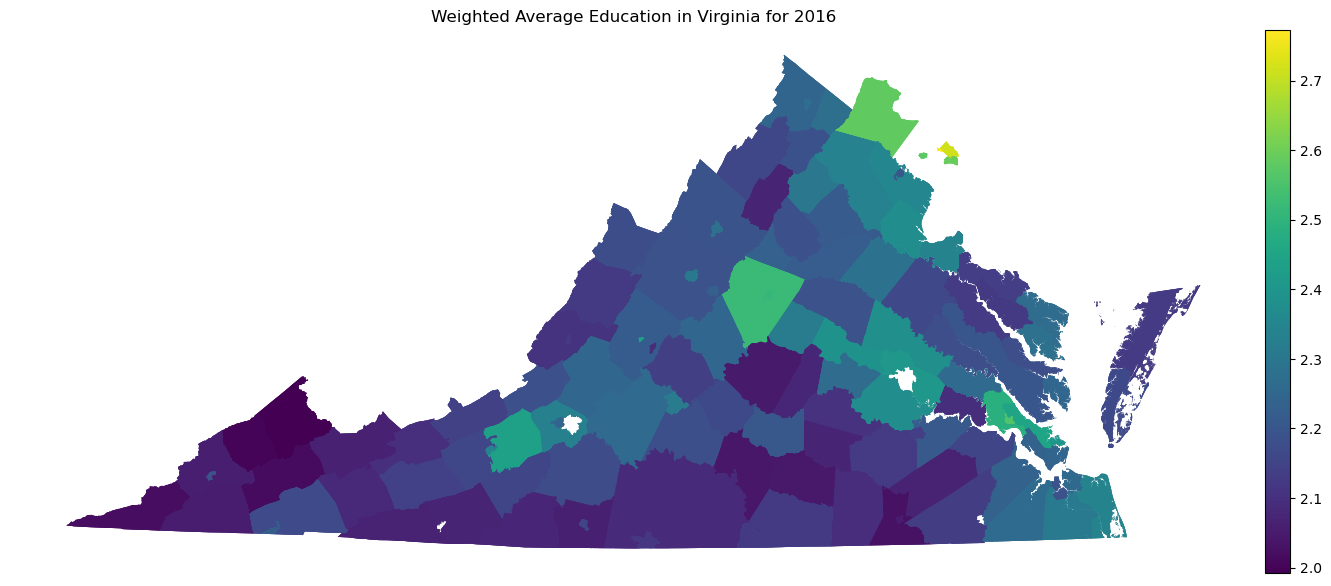

In [25]:
df2016Ed = df_vis[df_vis['year'] == 2016]
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
ax.set_title(f'Weighted Average Education in Virginia for 2016')
cax = divider.append_axes("right", size="2%", pad=0.08)
df2016Ed.plot(ax=ax,column='Education_Index',legend=True,cax=cax)

<Axes: title={'center': 'Weighted Average Income in Virginia for 2016'}>

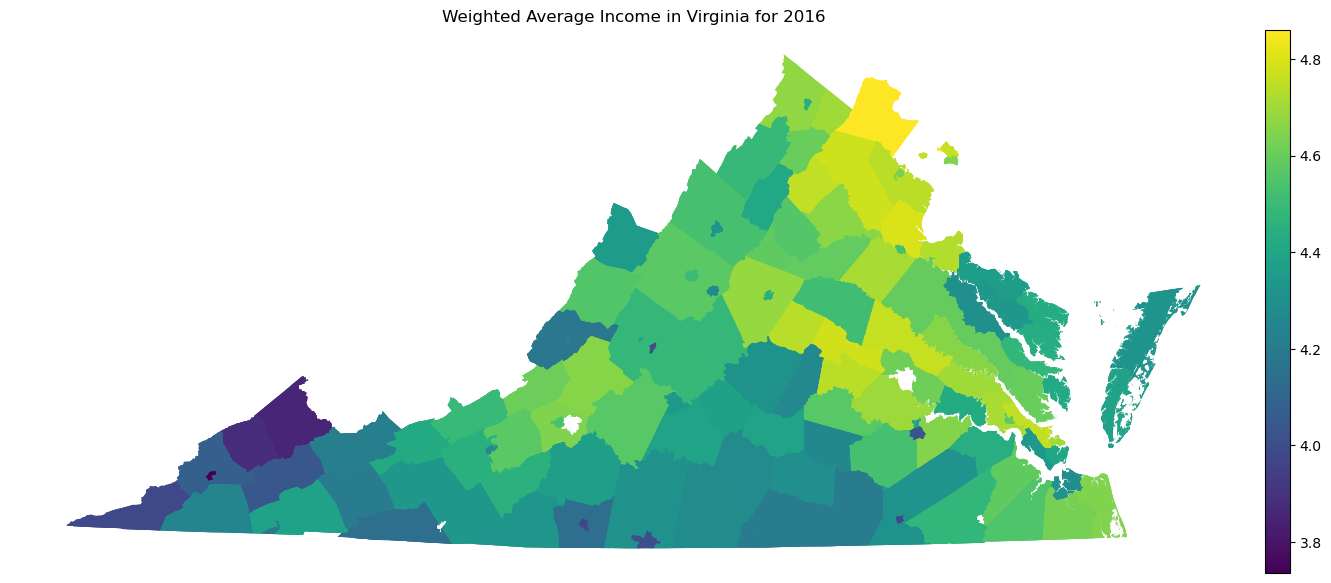

In [26]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
ax.set_title(f'Weighted Average Income in Virginia for 2016')
cax = divider.append_axes("right", size="2%", pad=0.08)
df2016Ed.plot(ax=ax,column='Weighted_Avg_Income',legend=True,cax=cax)

Here is the voting data for 2016.

<Axes: >

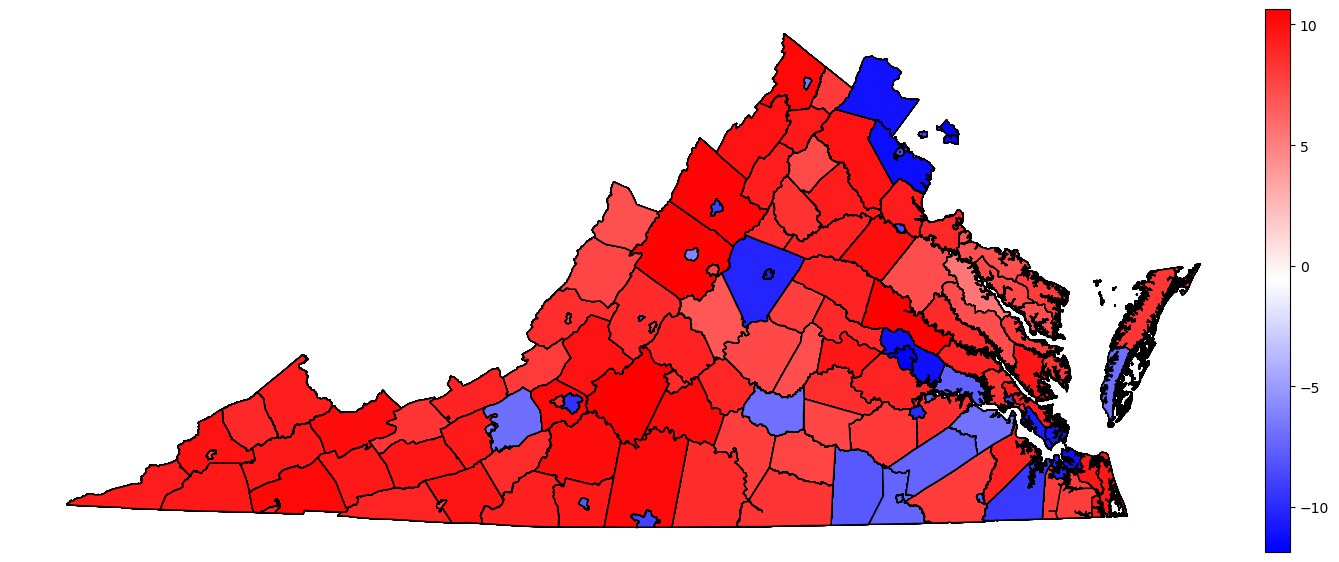

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
cax = divider.append_axes("right", size="2%", pad=0.08)
df_vis.plot(ax=ax,column='vote_diff_ihs_2016',legend=True,cax=cax,cmap='bwr',edgecolor='k')

Here is the education and income data for 2020.

<Axes: title={'center': 'Weighted Average Education in Virginia for 2020'}>

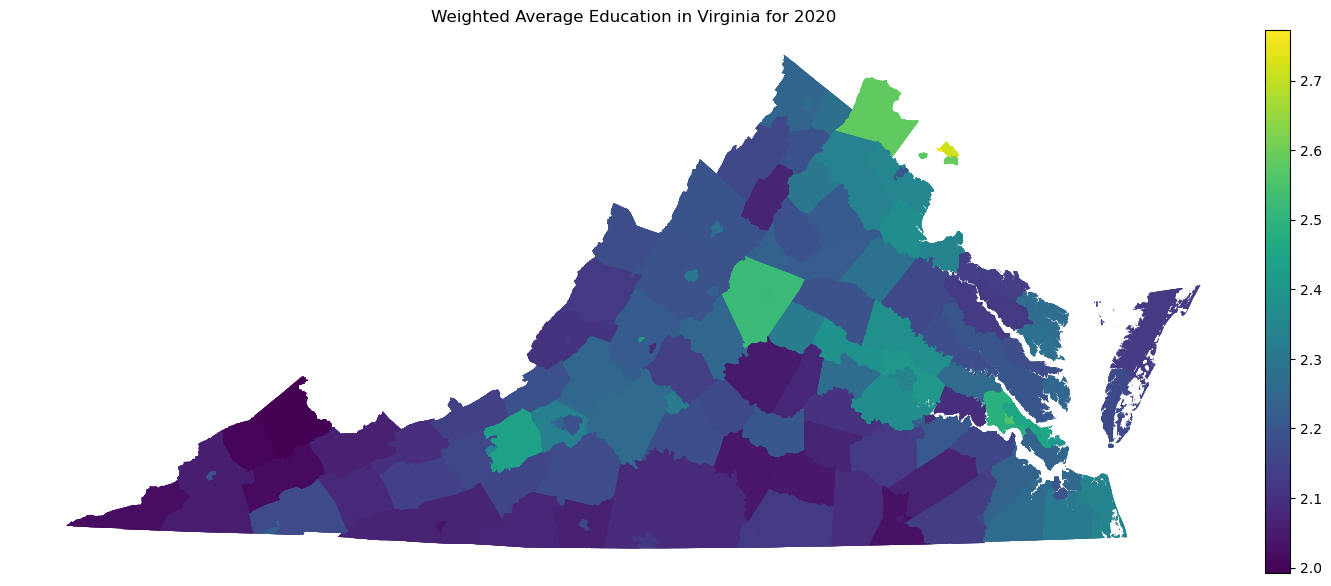

In [28]:
df2020Ed = df_vis[df_vis['year'] == 2020]
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
ax.set_title(f'Weighted Average Education in Virginia for 2020')
cax = divider.append_axes("right", size="2%", pad=0.08)
df2020Ed.plot(ax=ax,column='Education_Index',legend=True,cax=cax)

<Axes: title={'center': 'Weighted Average Income in Virginia for 2020'}>

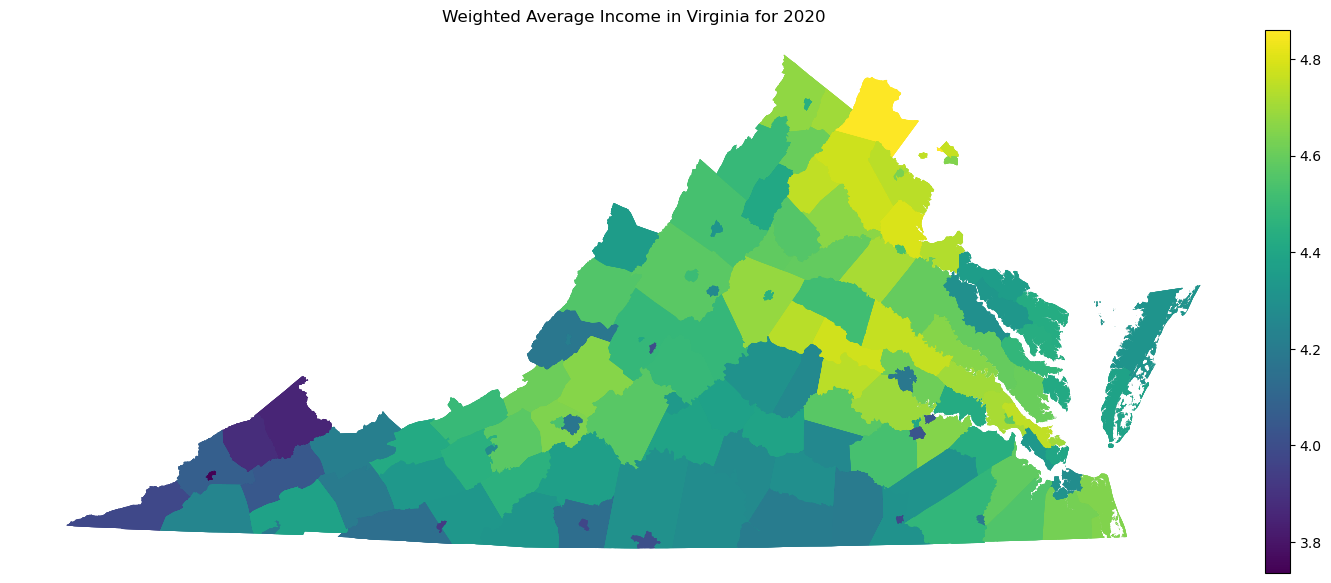

In [29]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
ax.set_title(f'Weighted Average Income in Virginia for 2020')
cax = divider.append_axes("right", size="2%", pad=0.08)
df2020Ed.plot(ax=ax,column='Weighted_Avg_Income',legend=True,cax=cax)

Here is the voting data for 2020.

<Axes: >

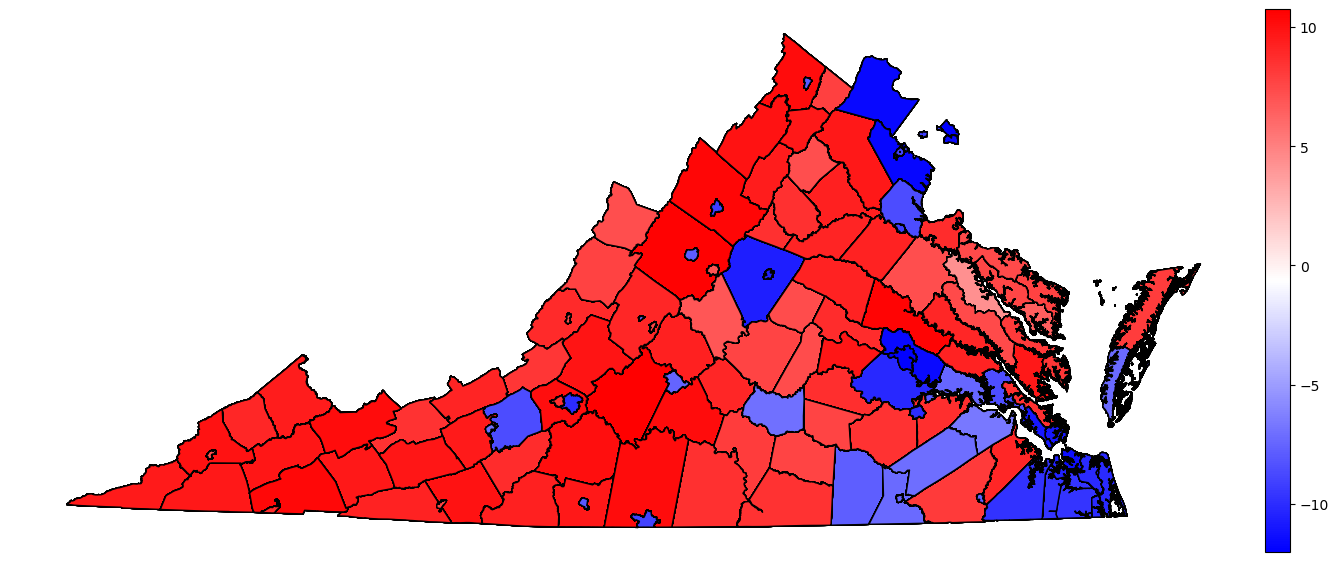

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
cax = divider.append_axes("right", size="2%", pad=0.08)
df_vis.plot(ax=ax,column='vote_diff_ihs_2020',legend=True,cax=cax,cmap='bwr',edgecolor='k')

For 2016 and 2020 data, we see that some counties in Virginia with a higher weighted education average vote predominantly blue. We see this in the northern, western, and southwestern counties. However, some counties with a higher weighted education level voted more republican, but more counties with that higher average education voted Democrat. Thus, there is a possible slight correlation between higher average education levels and voting tendencies in Virginia. In both 2016 and 2020, the voting pattern maps (red and blue maps) illustrate a clear political divide that appears to correlate somewhat with income distribution. Northern Virginia, which has higher income levels, shows a stronger preference for the Democratic Party, which is often associated with urban and suburban areas where higher education and income levels are prevalent. Rural counties, especially in southwestern Virginia, which are shown to have lower income levels, predominantly support the Republican Party. Between 2016 and 2020, there appears to be some intensification of political leanings. Counties that voted Democratic or Republican in 2016 generally appear to have continued or intensified those preferences in 2020. This might suggest a deepening of political polarization, which is a trend noted nationally.
The slight shifts in voting patterns could also be influenced by changes in demographic patterns. High-income areas like Northern Virginia may support Democratic candidates due to factors such as higher educational attainment, demographic diversity, and liberal social values that align more closely with the Democratic Party. Lower-income counties might support Republican candidates possibly due to conservative values, resistance to rapid economic and social changes, or economic policies perceived as more favorable to rural and agricultural economic sectors.


# Analysis

In [9]:
# split df into testing and training, where testing is all rows with year between 2000 and 2016 (inclusive), and training is all rows with year as 2020
train_data = df[(df['year'] >= 2000) & (df['year'] <= 2016)]
test_data = df[df['year'] == 2020]

print(train_data.shape)
print(test_data.shape)

(2016, 180)
(528, 180)


In [10]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Random Forests

#### Both education and income

In [11]:
vars = ['year', 'county_name', 'party', 'totalvotes', "AV0AA", "B69AA", "B69AB", "B69AC", "A88AA","A88AB","A88AC","A88AD","A88AE"]

X_train = train_data.loc[:, vars]
Y_train = train_data.loc[:, 'candidatevotes']
X_test = test_data.loc[:, vars]
Y_test = test_data.loc[:, 'candidatevotes']

# Encode categorical data
X_train = pd.get_dummies(X_train, columns=['county_name', 'party'])
X_test = pd.get_dummies(X_test, columns=['county_name', 'party'])

# Ensuring the same columns in train and test sets
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Reinitialize and train the RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, Y_train)

# Predict on the test set and calculate RMSE
Y_pred = rf.predict(X_test)

# Calculate the root mean squared error
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)  # RMSE is just the square root of MSE
mae = mean_absolute_error(Y_test, Y_pred)
r_squared = r2_score(Y_test, Y_pred)

def mean_absolute_percentage_error(y_true, y_pred):
    """
    Calculate mean absolute percentage error (MAPE) avoiding divisions by zero
    and handle cases where actual values are zero by excluding them from the calculation.
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Create a mask for elements where the denominator isn't zero
    mask = y_true != 0
    if np.any(mask):  # Check if there are any non-zero elements to avoid empty slice
        mape = np.abs((y_true[mask] - y_pred[mask]) / y_true[mask]) * 100
        return np.mean(mape)
    else:
        return np.nan  # Return NaN if all y_true values are zero or if no valid values are found
    

mape = mean_absolute_percentage_error(Y_test, Y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Absolute Percentage Error: {mape:.2f}%')
print(f'R-squared: {r_squared}')

Mean Squared Error: 143594647.7163835
Root Mean Squared Error: 11983.098418872452
Mean Absolute Error: 4787.315397727273
Mean Absolute Percentage Error: 1332.42%
R-squared: 0.5451191430748419


#### Only income

In [12]:
vars = ['year', 'county_name', 'party', 'totalvotes', "AV0AA", "A88AA","A88AB","A88AC","A88AD","A88AE"]

X_train = train_data.loc[:, vars]
Y_train = train_data.loc[:, 'candidatevotes']
X_test = test_data.loc[:, vars]
Y_test = test_data.loc[:, 'candidatevotes']

# Encode categorical data
X_train = pd.get_dummies(X_train, columns=['county_name', 'party'])
X_test = pd.get_dummies(X_test, columns=['county_name', 'party'])

# Ensuring the same columns in train and test sets
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Reinitialize and train the RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, Y_train)

# Predict on the test set and calculate RMSE
Y_pred = rf.predict(X_test)

# Calculate the root mean squared error
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)  # RMSE is just the square root of MSE
mae = mean_absolute_error(Y_test, Y_pred)
r_squared = r2_score(Y_test, Y_pred)

def mean_absolute_percentage_error(y_true, y_pred):
    """
    Calculate mean absolute percentage error (MAPE) avoiding divisions by zero
    and handle cases where actual values are zero by excluding them from the calculation.
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Create a mask for elements where the denominator isn't zero
    mask = y_true != 0
    if np.any(mask):  # Check if there are any non-zero elements to avoid empty slice
        mape = np.abs((y_true[mask] - y_pred[mask]) / y_true[mask]) * 100
        return np.mean(mape)
    else:
        return np.nan  # Return NaN if all y_true values are zero or if no valid values are found
    

mape = mean_absolute_percentage_error(Y_test, Y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Absolute Percentage Error: {mape:.2f}%')
print(f'R-squared: {r_squared}')

Mean Squared Error: 141912451.9420818
Root Mean Squared Error: 11912.70128652951
Mean Absolute Error: 4802.465833333334
Mean Absolute Percentage Error: 1320.85%
R-squared: 0.5504480231375696


#### Only education

In [13]:
vars = ['year', 'county_name', 'party', 'totalvotes', "AV0AA", "B69AA", "B69AB", "B69AC"]

X_train = train_data.loc[:, vars]
Y_train = train_data.loc[:, 'candidatevotes']
X_test = test_data.loc[:, vars]
Y_test = test_data.loc[:, 'candidatevotes']

# Encode categorical data
X_train = pd.get_dummies(X_train, columns=['county_name', 'party'])
X_test = pd.get_dummies(X_test, columns=['county_name', 'party'])

# Ensuring the same columns in train and test sets
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Reinitialize and train the RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, Y_train)

# Predict on the test set and calculate RMSE
Y_pred = rf.predict(X_test)

# Calculate the root mean squared error
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)  # RMSE is just the square root of MSE
mae = mean_absolute_error(Y_test, Y_pred)
r_squared = r2_score(Y_test, Y_pred)

def mean_absolute_percentage_error(y_true, y_pred):
    """
    Calculate mean absolute percentage error (MAPE) avoiding divisions by zero
    and handle cases where actual values are zero by excluding them from the calculation.
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Create a mask for elements where the denominator isn't zero
    mask = y_true != 0
    if np.any(mask):  # Check if there are any non-zero elements to avoid empty slice
        mape = np.abs((y_true[mask] - y_pred[mask]) / y_true[mask]) * 100
        return np.mean(mape)
    else:
        return np.nan  # Return NaN if all y_true values are zero or if no valid values are found
    

mape = mean_absolute_percentage_error(Y_test, Y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Absolute Percentage Error: {mape:.2f}%')
print(f'R-squared: {r_squared}')

Mean Squared Error: 145329367.75192273
Root Mean Squared Error: 12055.263072696618
Mean Absolute Error: 4836.608939393939
Mean Absolute Percentage Error: 1319.06%
R-squared: 0.5396238760238731


### Neural Network

#### Both education and income

In [14]:
vars = ['year', 'county_name', 'party', 'totalvotes', "AV0AA", "B69AA", "B69AB", "B69AC", "A88AA","A88AB","A88AC","A88AD","A88AE"]

X_train = train_data.loc[:, vars]
Y_train = train_data.loc[:, 'candidatevotes']
X_test = test_data.loc[:, vars]
Y_test = test_data.loc[:, 'candidatevotes']

# Preprocessing
categorical_features = ['party', 'county_name']
numeric_features = ['year', 'totalvotes', "AV0AA", "B69AA", "B69AB", "B69AC", "A88AA","A88AB","A88AC","A88AD","A88AE"]

# Create a transformer for numerical attributes
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Create a transformer for categorical attributes
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combine transformers into a preprocessor step
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Fit the preprocessor on the training data
preprocessor.fit(X_train)
X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Model creation
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_transformed.shape[1],)),
    Dense(112, activation='relu'),
    Dense(96, activation='relu'),
    Dense(80, activation='relu'),
    Dense(64, activation='relu'),
    Dense(48, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='linear')
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
model.fit(X_train_transformed, Y_train, epochs=10, batch_size=10)

# Predict using the model
Y_pred = model.predict(X_test_transformed)

# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)  # RMSE is just the square root of MSE
mae = mean_absolute_error(Y_test, Y_pred)
mape = mean_absolute_percentage_error(Y_test, Y_pred)
r_squared = r2_score(Y_test, Y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Absolute Percentage Error: {mape:.2f}%')
print(f'R-squared: {r_squared}')

Epoch 1/10


2024-05-07 19:06:58.884907: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


202/202 [==============================] - 0s 855us/step - loss: 142424544.0000
Epoch 2/10
202/202 [==============================] - 0s 1ms/step - loss: 63631876.0000
Epoch 3/10
202/202 [==============================] - 0s 985us/step - loss: 38804240.0000
Epoch 4/10
202/202 [==============================] - 0s 963us/step - loss: 23828554.0000
Epoch 5/10
202/202 [==============================] - 0s 982us/step - loss: 18342472.0000
Epoch 6/10
202/202 [==============================] - 0s 1ms/step - loss: 13476121.0000
Epoch 7/10
202/202 [==============================] - 0s 998us/step - loss: 11040279.0000
Epoch 8/10
202/202 [==============================] - 0s 1ms/step - loss: 13895502.0000
Epoch 9/10
202/202 [==============================] - 0s 1ms/step - loss: 11744316.0000
Epoch 10/10
17/17 [==============================] - 0s 457us/step
Mean Squared Error: 67270881.85541888
Root Mean Squared Error: 8201.882823804475
Mean Absolute Error: 3069.0691284988866
Mean Absolute Percen

#### Only income

In [15]:
vars = ['year', 'county_name', 'party', 'totalvotes', "AV0AA", "A88AA","A88AB","A88AC","A88AD","A88AE"]

X_train = train_data.loc[:, vars]
Y_train = train_data.loc[:, 'candidatevotes']
X_test = test_data.loc[:, vars]
Y_test = test_data.loc[:, 'candidatevotes']

# Preprocessing
categorical_features = ['party', 'county_name']
numeric_features = ['year', 'totalvotes',"AV0AA", "A88AA","A88AB","A88AC","A88AD","A88AE"]

# Create a transformer for numerical attributes
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Create a transformer for categorical attributes
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combine transformers into a preprocessor step
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Fit the preprocessor on the training data
preprocessor.fit(X_train)
X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Model creation
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_transformed.shape[1],)),
    Dense(112, activation='relu'),
    Dense(96, activation='relu'),
    Dense(80, activation='relu'),
    Dense(64, activation='relu'),
    Dense(48, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='linear')
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
model.fit(X_train_transformed, Y_train, epochs=10, batch_size=10)

# Predict using the model
Y_pred = model.predict(X_test_transformed)

# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)  # RMSE is just the square root of MSE
mae = mean_absolute_error(Y_test, Y_pred)
mape = mean_absolute_percentage_error(Y_test, Y_pred)
r_squared = r2_score(Y_test, Y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Absolute Percentage Error: {mape:.2f}%')
print(f'R-squared: {r_squared}')

Epoch 1/10
202/202 [==============================] - 0s 1ms/step - loss: 132083128.0000
Epoch 2/10
202/202 [==============================] - 0s 1ms/step - loss: 61151236.0000
Epoch 3/10
202/202 [==============================] - 0s 1ms/step - loss: 34433876.0000
Epoch 4/10
202/202 [==============================] - 0s 1ms/step - loss: 21408658.0000
Epoch 5/10
202/202 [==============================] - 0s 1ms/step - loss: 16430006.0000
Epoch 6/10
202/202 [==============================] - 0s 1ms/step - loss: 12316817.0000
Epoch 7/10
202/202 [==============================] - 0s 992us/step - loss: 11157753.0000
Epoch 8/10
202/202 [==============================] - 0s 1ms/step - loss: 8801596.0000
Epoch 9/10
202/202 [==============================] - 0s 989us/step - loss: 6000882.0000
Epoch 10/10
17/17 [==============================] - 0s 455us/step
Mean Squared Error: 56593723.19069008
Root Mean Squared Error: 7522.879979814252
Mean Absolute Error: 2474.345741156376
Mean Absolute Perc

#### Only education

In [16]:
vars = ['year', 'county_name', 'party', 'totalvotes', "AV0AA", "B69AA", "B69AB", "B69AC"]

X_train = train_data.loc[:, vars]
Y_train = train_data.loc[:, 'candidatevotes']
X_test = test_data.loc[:, vars]
Y_test = test_data.loc[:, 'candidatevotes']

# Preprocessing
categorical_features = ['party', 'county_name']
numeric_features = ['year', 'totalvotes',"AV0AA", "B69AA", "B69AB", "B69AC"]

# Create a transformer for numerical attributes
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Create a transformer for categorical attributes
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combine transformers into a preprocessor step
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Fit the preprocessor on the training data
preprocessor.fit(X_train)
X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Model creation
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_transformed.shape[1],)),
    Dense(112, activation='relu'),
    Dense(96, activation='relu'),
    Dense(80, activation='relu'),
    Dense(64, activation='relu'),
    Dense(48, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='linear')
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
model.fit(X_train_transformed, Y_train, epochs=10, batch_size=10)

# Predict using the model
Y_pred = model.predict(X_test_transformed)

# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)  # RMSE is just the square root of MSE
mae = mean_absolute_error(Y_test, Y_pred)
mape = mean_absolute_percentage_error(Y_test, Y_pred)
r_squared = r2_score(Y_test, Y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Absolute Percentage Error: {mape:.2f}%')
print(f'R-squared: {r_squared}')

Epoch 1/10
202/202 [==============================] - 0s 860us/step - loss: 112416432.0000
Epoch 2/10
202/202 [==============================] - 0s 955us/step - loss: 63001720.0000
Epoch 3/10
202/202 [==============================] - 0s 958us/step - loss: 39963028.0000
Epoch 4/10
202/202 [==============================] - 0s 959us/step - loss: 23330470.0000
Epoch 5/10
202/202 [==============================] - 0s 1ms/step - loss: 21214568.0000
Epoch 6/10
202/202 [==============================] - 0s 958us/step - loss: 15006978.0000
Epoch 7/10
202/202 [==============================] - 0s 1ms/step - loss: 10827515.0000
Epoch 8/10
202/202 [==============================] - 0s 978us/step - loss: 10040488.0000
Epoch 9/10
202/202 [==============================] - 0s 1ms/step - loss: 10038621.0000
Epoch 10/10
17/17 [==============================] - 0s 481us/step
Mean Squared Error: 54104095.505886644
Root Mean Squared Error: 7355.548620319673
Mean Absolute Error: 3276.2106226140804
Mean A

# Conclusion

Let's focus in on income data, specifically the variables A88AA-A88AE

In [17]:
# Focus on relevant columns: income brackets, candidate votes, party, and year
election_income_df = pd.read_csv("properly_merged_data.csv")
income_columns = ['year', 'county_name', 'party', 'candidatevotes', 'A88AA', 'A88AB', 'A88AC', 'A88AD', 'A88AE']
election_income_df = election_income_df[income_columns]

In [18]:
election_income_df['total_population'] = election_income_df[['A88AA', 'A88AB', 'A88AC', 'A88AD', 'A88AE']].sum(axis=1)

# Calculate the proportion of each income bracket
for column in ['A88AA', 'A88AB', 'A88AC', 'A88AD', 'A88AE']:
    election_income_df[column + '_prop'] = election_income_df[column] / election_income_df['total_population']

# Apply the proportions to the candidatevotes to estimate votes per income bracket
for column in ['A88AA', 'A88AB', 'A88AC', 'A88AD', 'A88AE']:
    election_income_df[column + '_votes'] = election_income_df[column + '_prop'] * election_income_df['candidatevotes']

# Now group by year and party and sum the estimated votes for each income bracket
aggregated_data = election_income_df.groupby(['year', 'party']).agg({
    'candidatevotes': 'sum',
    'A88AA_votes': 'sum',
    'A88AB_votes': 'sum',
    'A88AC_votes': 'sum',
    'A88AD_votes': 'sum',
    'A88AE_votes': 'sum'
}).reset_index()

pd.set_option('display.float_format', lambda x: '%.2f' % x)

aggregated_data

,year,party,candidatevotes,A88AA_votes,A88AB_votes,A88AC_votes,A88AD_votes,A88AE_votes
0,2000,DEMOCRAT,951375,45779.56,36021.81,96500.63,277026.41,496046.60
1,2000,GREEN,43915,1855.50,1481.25,4064.90,12164.46,24348.89
2,2000,OTHER,21309,1059.07,875.65,2310.07,6457.92,10606.29
3,2000,REPUBLICAN,1190770,50922.74,42192.02,117022.13,349425.43,631207.68
4,2004,DEMOCRAT,1129032,52472.01,41178.60,110850.62,322670.89,601859.89
5,2004,OTHER,21748,1007.19,829.46,2257.94,6472.62,11180.78
6,2004,REPUBLICAN,1456202,61165.21,50744.80,141382.62,425091.70,777817.67
7,2008,DEMOCRAT,1537789,54460.42,37820.51,98917.28,302044.10,1044546.69
8,2008,OTHER,32338,1161.05,826.43,2224.23,6708.24,21418.06
9,2008,REPUBLICAN,1479795,50155.50,35994.99,96330.24,300864.11,996450.16
